In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM

### Reading the data

In [35]:
import pandas as pd

#Path to training and test data

train_path = '../data/train.csv'
test_path = '../data/test.csv'

In [36]:
### Reading the train and test data

train_data = pd.read_csv(train_path, parse_dates = True, low_memory = False)
test_data = pd.read_csv(test_path, parse_dates = True, low_memory = False)

In [37]:
#Creating a datetime object for our data date

train_data['Date'] = pd.to_datetime(train_data['Date'])

### Isolating the Rossman dataframe into time series data

In [38]:
sales_df = train_data[['Date', 'Sales']].set_index('Date')

In [39]:
sales_df.head()

,Sales
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


In [40]:
# Normalize the data

scaler = MinMaxScaler()
sales_df['salesScaled'] = scaler.fit_transform(sales_df[['Sales']])

In [41]:
sales_df.head()

,Sales,salesScaled
Date,,
2015-07-31,5263,0.126664
2015-07-31,6064,0.145941
2015-07-31,8314,0.200091
2015-07-31,13995,0.336815
2015-07-31,4822,0.116050


### Descriptive statistics and visualization

In [43]:
## Descriptive Statistical Visualization
sales_df.describe()


,Sales,salesScaled
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,1.389574e-01
std,3.849926e+03,9.265544e-02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,8.969700e-02
50%,5.744000e+03,1.382398e-01
75%,7.856000e+03,1.890689e-01
max,4.155100e+04,1.000000e+00


In [44]:
sales_df.shape


(1017209, 2)

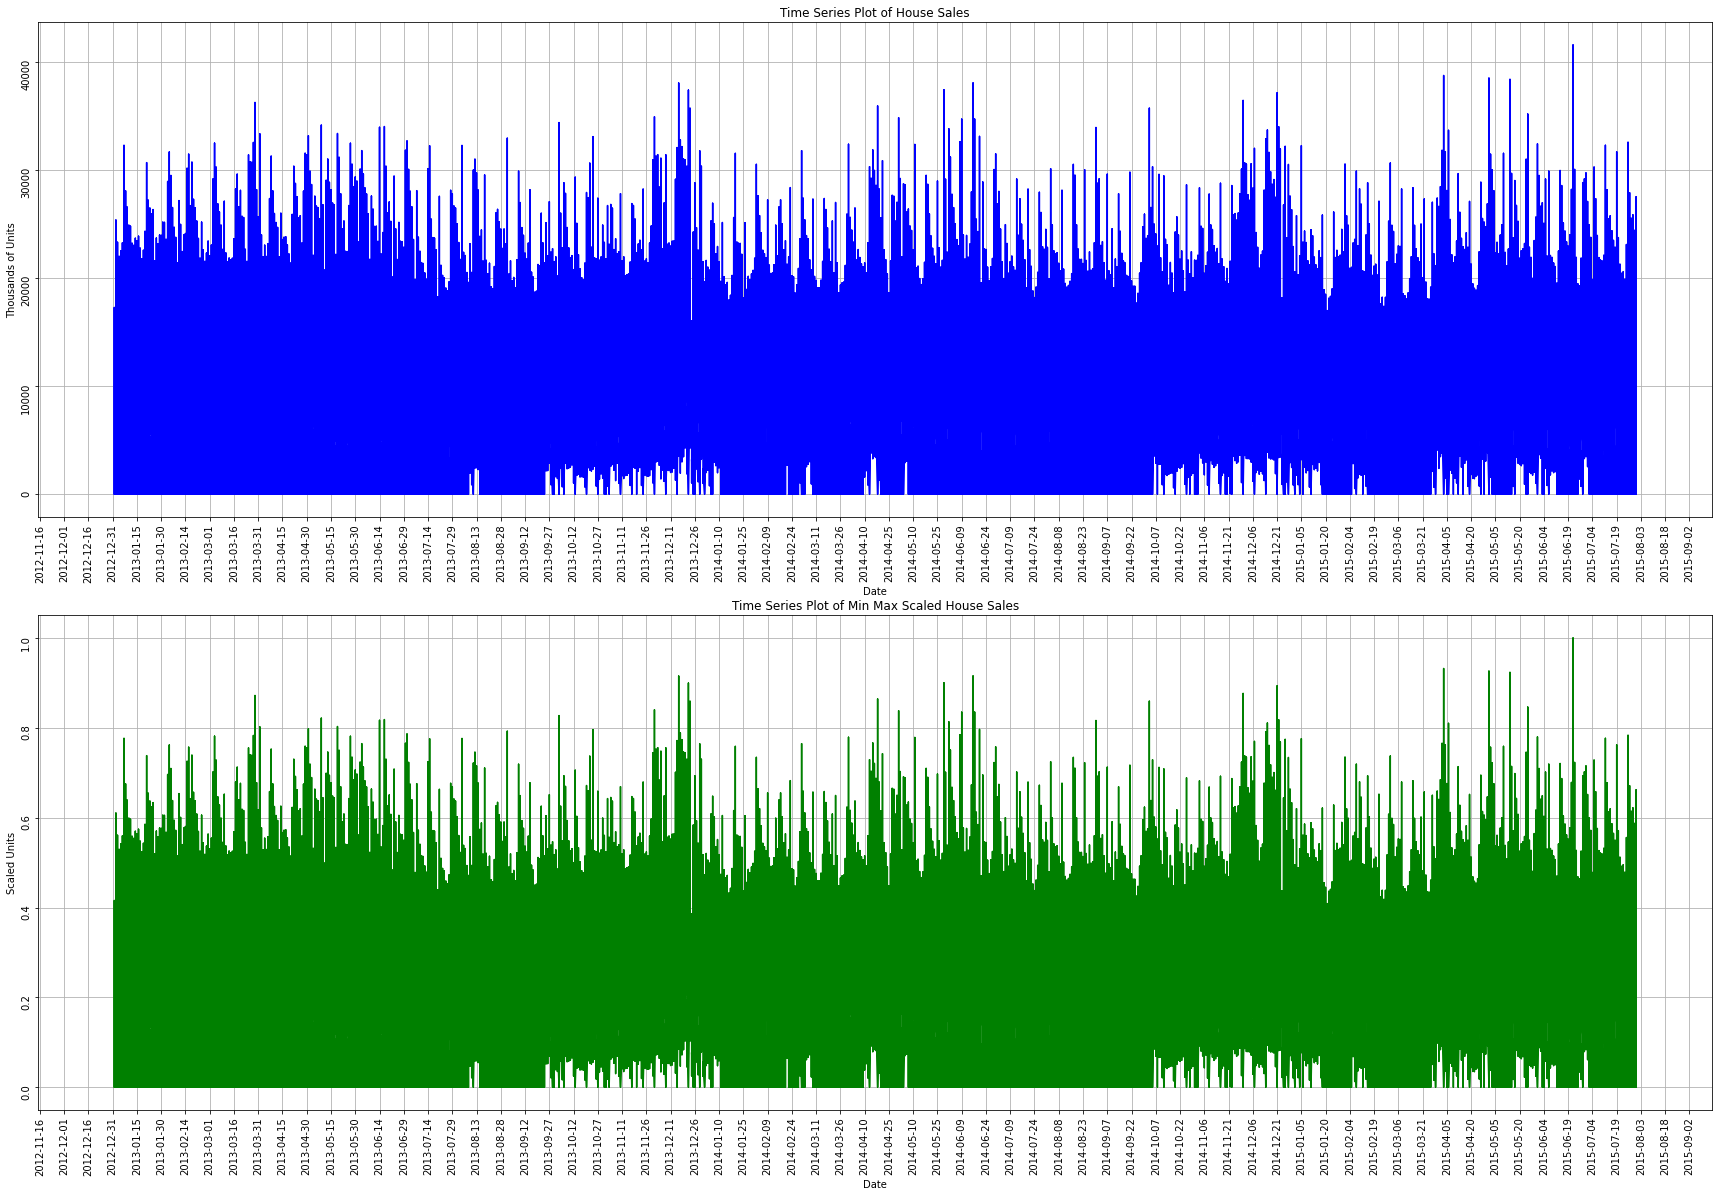

In [14]:
### Plot
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(sales_df.index, sales_df.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of House Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(sales_df.index, sales_df.salesScaled, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text('Time Series Plot of Min Max Scaled House Sales')
ax2.grid(True)
plt.show()

In [ ]:
#Unit Root Tests helps us determine the stationarity of our data
adfResult = adfuller(sales_df.Sales.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')